Objectif : prédire le prix de vente d'un bien immobiliers à partir de données

Importation des librairies

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [33]:
data_train = pd.read_csv('/content/train.csv')
# data_test = pd.read_csv('/content/test.csv')

In [34]:
print(f'Le dataset contient {data_train.shape[0]} lignes et {data_train.shape[1]} colonnes')

Le dataset contient 1460 lignes et 81 colonnes


In [35]:
data_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,...,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,

In [36]:
data_train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [37]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [38]:
data_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


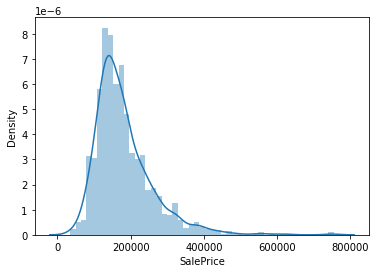

In [39]:
sns.distplot(data_train['SalePrice'])

In [40]:
# Create new features
# 1* Simplifications of existing features
data_train["SimplOverallQual"] = data_train.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
data_train["SimplOverallCond"] = data_train.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
data_train["SimplPoolQC"] = data_train.PoolQC.replace({1 : 1, 2 : 1, # average
                                             3 : 2, 4 : 2 # good
                                            })
data_train["SimplGarageCond"] = data_train.GarageCond.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
data_train["SimplGarageQual"] = data_train.GarageQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
data_train["SimplFireplaceQu"] = data_train.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
data_train["SimplFireplaceQu"] = data_train.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
data_train["SimplFunctional"] = data_train.Functional.replace({1 : 1, 2 : 1, # bad
                                                     3 : 2, 4 : 2, # major
                                                     5 : 3, 6 : 3, 7 : 3, # minor
                                                     8 : 4 # typical
                                                    })
data_train["SimplKitchenQual"] = data_train.KitchenQual.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
data_train["SimplHeatingQC"] = data_train.HeatingQC.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
data_train["SimplBsmtFinType1"] = data_train.BsmtFinType1.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
data_train["SimplBsmtFinType2"] = data_train.BsmtFinType2.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
data_train["SimplBsmtCond"] = data_train.BsmtCond.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
data_train["SimplBsmtQual"] = data_train.BsmtQual.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
data_train["SimplExterCond"] = data_train.ExterCond.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
data_train["SimplExterQual"] = data_train.ExterQual.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })

# Has masonry veneer or not
data_train["HasMasVnr"] = data_train.MasVnrType.replace({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, 
                                               "Stone" : 1, "None" : 0})
# House completed before sale or not
data_train["BoughtOffPlan"] = data_train.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, 
                                                      "Family" : 0, "Normal" : 0, "Partial" : 1})

In [41]:
# # 2* Combinations of existing features
# # Overall quality of the house
# data_train["OverallGrade"] = data_train["OverallQual"] * data_train["OverallCond"]
# # Overall quality of the garage
# data_train["GarageGrade"] = data_train["GarageQual"] * data_train["GarageCond"]
# # Overall quality of the exterior
# data_train["ExterGrade"] = data_train["ExterQual"] * data_train["ExterCond"]
# # Overall kitchen score
# data_train["KitchenScore"] = data_train["KitchenAbvGr"] * data_train["KitchenQual"]
# # Overall fireplace score
# data_train["FireplaceScore"] = data_train["Fireplaces"] * data_train["FireplaceQu"]
# # Overall garage score
# data_train["GarageScore"] = data_train["GarageArea"] * data_train["GarageQual"]
# # Overall pool score
# data_train["PoolScore"] = data_train["PoolArea"] * data_train["PoolQC"]
# # Simplified overall quality of the house
# data_train["SimplOverallGrade"] = data_train["SimplOverallQual"] * data_train["SimplOverallCond"]
# # Simplified overall quality of the exterior
# data_train["SimplExterGrade"] = data_train["SimplExterQual"] * data_train["SimplExterCond"]
# # Simplified overall pool score
# data_train["SimplPoolScore"] = data_train["PoolArea"] * data_train["SimplPoolQC"]
# # Simplified overall garage score
# data_train["SimplGarageScore"] = data_train["GarageArea"] * data_train["SimplGarageQual"]
# # Simplified overall fireplace score
# data_train["SimplFireplaceScore"] = data_train["Fireplaces"] * data_train["SimplFireplaceQu"]
# # Simplified overall kitchen score
# data_train["SimplKitchenScore"] = data_train["KitchenAbvGr"] * data_train["SimplKitchenQual"]
# # Total number of bathrooms
# data_train["TotalBath"] = data_train["BsmtFullBath"] + (0.5 * data_train["BsmtHalfBath"]) + \
# data_train["FullBath"] + (0.5 * data_train["HalfBath"])
# # Total SF for house (incl. basement)
# data_train["AllSF"] = data_train["GrLivArea"] + data_train["TotalBsmtSF"]
# # Total SF for 1st + 2nd floors
# data_train["AllFlrsSF"] = data_train["1stFlrSF"] + data_train["2ndFlrSF"]
# # Total SF for porch
# data_train["AllPorchSF"] = data_train["OpenPorchSF"] + data_train["EnclosedPorch"] + \
# data_train["3SsnPorch"] + data_train["ScreenPorch"]


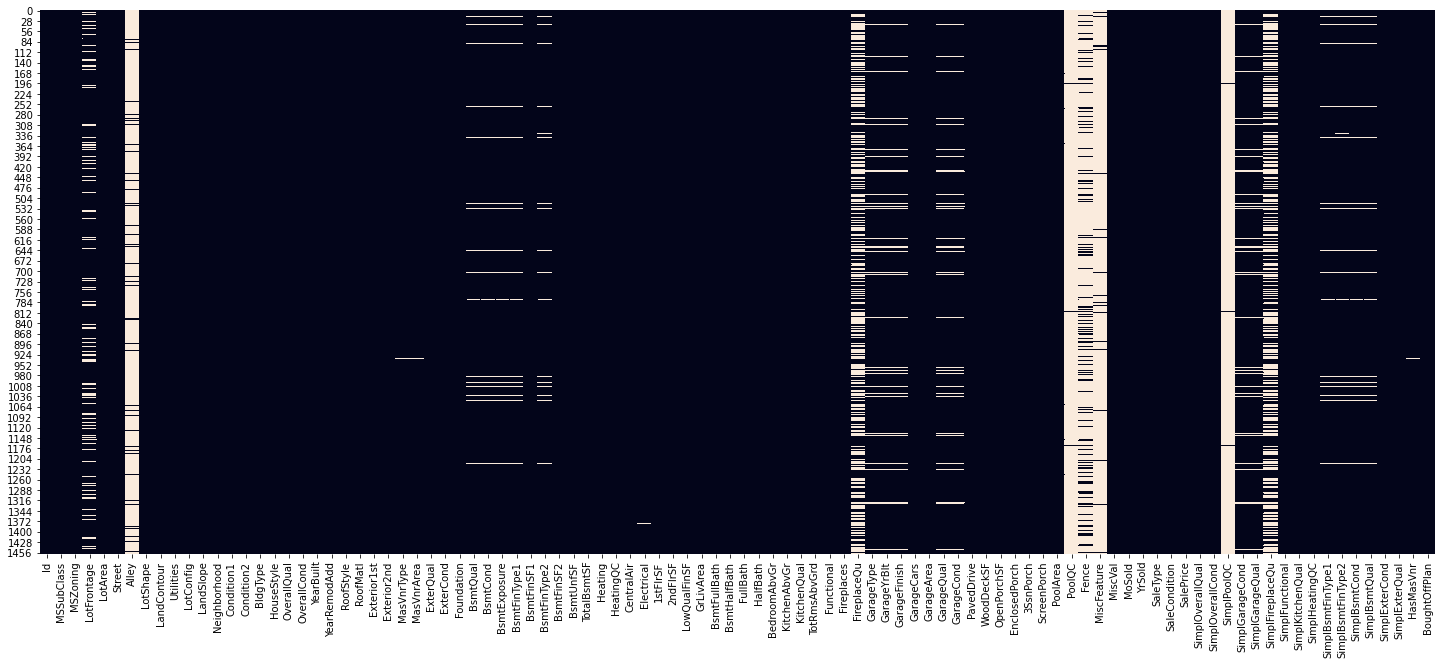

In [42]:
plt.figure(figsize=(25,10))
sns.heatmap(data_train.isna(),cbar=False)

In [43]:
data_train.drop(['Id','Alley','FireplaceQu','PoolQC','Fence','MiscFeature','SimplPoolQC','SimplFireplaceQu'], axis=1, inplace=True)

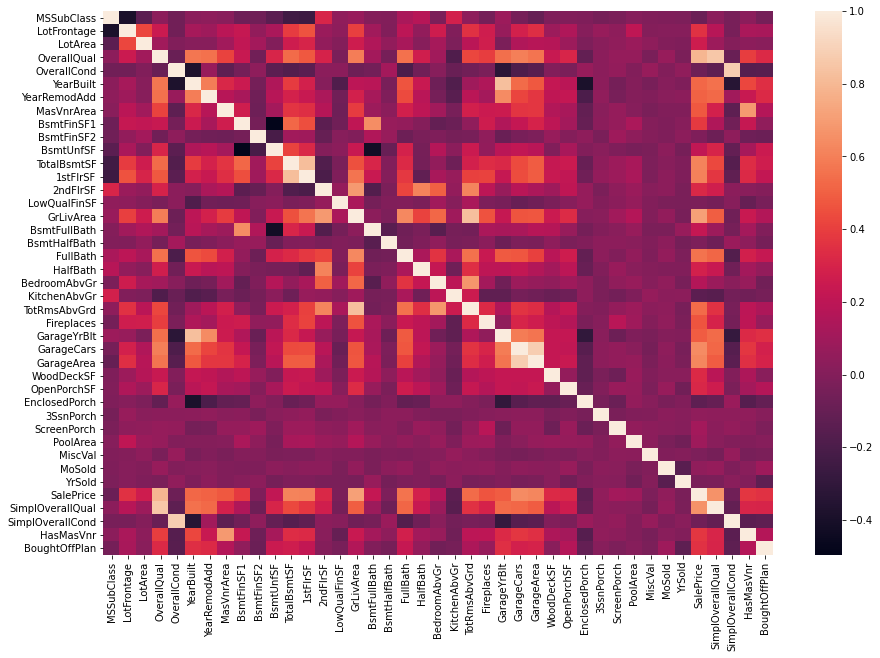

In [44]:
plt.figure(figsize=(15,10))
sns.heatmap(data_train.corr())

In [45]:
# data_train.drop(['MSSubClass','OverallCond','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','KitchenAbvGr','EnclosedPorch','YrSold','3SsnPorch','MoSold'], axis=1, inplace=True)
# data_test.drop(['MSSubClass','OverallCond','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','KitchenAbvGr','EnclosedPorch','YrSold','3SsnPorch','MoSold'], axis=1, inplace=True)

In [46]:
data_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [47]:
for col in data_train.select_dtypes('object'):
  print(f'{col :-<20}{data_train[col].unique()}')

MSZoning------------['RL' 'RM' 'C (all)' 'FV' 'RH']
Street--------------['Pave' 'Grvl']
LotShape------------['Reg' 'IR1' 'IR2' 'IR3']
LandContour---------['Lvl' 'Bnk' 'Low' 'HLS']
Utilities-----------['AllPub' 'NoSeWa']
LotConfig-----------['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope-----------['Gtl' 'Mod' 'Sev']
Neighborhood--------['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1----------['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2----------['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType------------['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle----------['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle-----------['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl---------

In [48]:
data_train.dropna(axis=0, inplace=True)
print(f'Le dataset contient {data_train.shape[0]} lignes et {data_train.shape[1]} colonnes')

Le dataset contient 1094 lignes et 90 colonnes


In [49]:
print(f'Le dataset contient maintenant {data_train.isna().sum().sum()} donnée manquante')

Le dataset contient maintenant 0 donnée manquante


In [50]:
print("Find most important features relative to target")
corr = data_train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Find most important features relative to target
SalePrice           1.000000
OverallQual         0.795437
GrLivArea           0.707481
SimplOverallQual    0.660308
GarageCars          0.652103
GarageArea          0.620772
TotalBsmtSF         0.617741
1stFlrSF            0.617692
FullBath            0.578299
TotRmsAbvGrd        0.560521
YearBuilt           0.523434
YearRemodAdd        0.519806
GarageYrBlt         0.502248
MasVnrArea          0.485409
Fireplaces          0.458182
HasMasVnr           0.381164
BsmtFinSF1          0.378678
BoughtOffPlan       0.369081
LotFrontage         0.343978
OpenPorchSF         0.338600
WoodDeckSF          0.330286
2ndFlrSF            0.302569
LotArea             0.302268
HalfBath            0.259469
BsmtFullBath        0.223948
BsmtUnfSF           0.191247
BedroomAbvGr        0.168489
ScreenPorch         0.106479
PoolArea            0.092085
MoSold              0.052584
3SsnPorch           0.033947
LowQualFinSF       -0.003541
YrSold             -0.00

In [51]:
# # Create new features
# # 3* Polynomials on the top 10 existing features
# data_train["OverallQual-s2"] = data_train["OverallQual"] ** 2
# data_train["OverallQual-s3"] = data_train["OverallQual"] ** 3
# data_train["OverallQual-Sq"] = np.sqrt(data_train["OverallQual"])
# data_train["AllSF-2"] = data_train["AllSF"] ** 2
# data_train["AllSF-3"] = data_train["AllSF"] ** 3
# data_train["AllSF-Sq"] = np.sqrt(data_train["AllSF"])
# data_train["AllFlrsSF-2"] = data_train["AllFlrsSF"] ** 2
# data_train["AllFlrsSF-3"] = data_train["AllFlrsSF"] ** 3
# data_train["AllFlrsSF-Sq"] = np.sqrt(data_train["AllFlrsSF"])
# data_train["GrLivArea-2"] = data_train["GrLivArea"] ** 2
# data_train["GrLivArea-3"] = data_train["GrLivArea"] ** 3
# data_train["GrLivArea-Sq"] = np.sqrt(data_train["GrLivArea"])
# data_train["SimplOverallQual-s2"] = data_train["SimplOverallQual"] ** 2
# data_train["SimplOverallQual-s3"] = data_train["SimplOverallQual"] ** 3
# data_train["SimplOverallQual-Sq"] = np.sqrt(data_train["SimplOverallQual"])
# data_train["ExterQual-2"] = data_train["ExterQual"] ** 2
# data_train["ExterQual-3"] = data_train["ExterQual"] ** 3
# data_train["ExterQual-Sq"] = np.sqrt(data_train["ExterQual"])
# data_train["GarageCars-2"] = data_train["GarageCars"] ** 2
# data_train["GarageCars-3"] = data_train["GarageCars"] ** 3
# data_train["GarageCars-Sq"] = np.sqrt(data_train["GarageCars"])
# data_train["TotalBath-2"] = data_train["TotalBath"] ** 2
# data_train["TotalBath-3"] = data_train["TotalBath"] ** 3
# data_train["TotalBath-Sq"] = np.sqrt(data_train["TotalBath"])
# data_train["KitchenQual-2"] = data_train["KitchenQual"] ** 2
# data_train["KitchenQual-3"] = data_train["KitchenQual"] ** 3
# data_train["KitchenQual-Sq"] = np.sqrt(data_train["KitchenQual"])
# data_train["GarageScore-2"] = data_train["GarageScore"] ** 2
# data_train["GarageScore-3"] = data_train["GarageScore"] ** 3
# data_train["GarageScore-Sq"] = np.sqrt(data_train["GarageScore"])

In [52]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [53]:
data_train = pd.get_dummies(data_train, prefix_sep="_", columns=data_train.select_dtypes(include='object').columns)

# encoder = OneHotEncoder()

# for col in data_train.select_dtypes('object'):
#   print(col)
#   data_train[col] = encoder.fit_transform(np.array(data_train[col]).reshape(-1, 1))


# for col in data_test.select_dtypes('object'):
#   print(col)
#   data_test[col] = encoder.fit_transform(np.array(data_test[col]).reshape(-1, 1))


In [54]:
data_train.dtypes.value_counts()

uint8      276
int64       37
float64      4
dtype: int64

In [55]:
from sklearn.model_selection import train_test_split, cross_val_score

In [56]:
y = data_train['SalePrice']
X = data_train.drop('SalePrice',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

print(f'Shape :\nX_train : {X_train.shape}\nX_test : {X_test.shape}\ny_train : {y_train.shape}\ny_test : {y_test.shape}')

Shape :
X_train : (984, 316)
X_test : (110, 316)
y_train : (984,)
y_test : (110,)


In [57]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import PolynomialFeatures

In [58]:
model_lr = LinearRegression()
model_ridge = make_pipeline(StandardScaler(),Ridge())
# svr_lin = SVR(kernel='linear')
model_dtree = make_pipeline(StandardScaler(), DecisionTreeRegressor(random_state=0))
model_rforest = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=0))
model_ada = make_pipeline(StandardScaler(), AdaBoostRegressor(random_state=0))
model_gboosting = make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=0))
model_bagging = make_pipeline(StandardScaler(), BaggingRegressor(random_state=0))
model_knn = make_pipeline(StandardScaler(), KNeighborsRegressor())

In [59]:
for model in [model_lr, model_ridge,model_dtree,model_rforest,model_ada,model_gboosting,model_bagging,model_knn]:
  print(model)
  model.fit(X_train, y_train)
  MAE = round(100*((abs(cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error').mean()))/(y_train.mean())),3)
  print(f'MAE cross-validation : {MAE} %\n')

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Score test : 0.8585105112814282
MAE cross-validation : 11.366 %

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)
Score test : 0.8584490752539128
MAE cross-validation : 10.946 %

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                       max_depth=None, max_features=None,
                                       max_leaf_nodes=None,
                                  

Feature importance : PermutationImportance

In [60]:
from sklearn.inspection import permutation_importance

perm = permutation_importance(model_gboosting, X_train, y_train, random_state=1)

indice = 0
for i in perm.importances_mean.argsort()[::-1]:
  if perm.importances_mean[i] - 2 * perm.importances_std[i] > 0 and indice < 10:
    indice += 1
    print(f"{X_train.columns[i]:<15} {perm.importances_mean[i]:.3f} +/- {perm.importances_std[i]:.3f}")

OverallQual     0.188 +/- 0.008
GrLivArea       0.119 +/- 0.006
TotalBsmtSF     0.029 +/- 0.002
2ndFlrSF        0.021 +/- 0.001
BsmtFinSF1      0.019 +/- 0.001
GarageCars      0.015 +/- 0.002
LotArea         0.015 +/- 0.001
YearRemodAdd    0.011 +/- 0.001
1stFlrSF        0.009 +/- 0.001
YearBuilt       0.006 +/- 0.001


In [ ]:
print('Model : GradientBoostingRegressor')
perf = []
min = 50
for k in np.linspace(0.1,0.4,4):
  for n in range(10,201,10):
    model_gboosting = make_pipeline(StandardScaler(), GradientBoostingRegressor(alpha=k, n_estimators=n))
    pourcentage = round(100*((abs(cross_val_score(model_gboosting, X_train, y_train, cv=5, scoring='neg_mean_absolute_error').mean()))/(y_train.mean())),3)
    if pourcentage < min:
      perf = [pourcentage,k,n]
      min = pourcentage
      print(f'Nouveau minimumum MAE avec alpha={k} et n_estimators={n} --> {min} %')

print(f'\nMinimum : {perf[0]}% pour alpha={perf[1]} et n_estimators={perf[2]}')
model_gboosting = make_pipeline(StandardScaler(), GradientBoostingRegressor(alpha=perf[1], n_estimators=perf[2]))
MAE = round(100*((abs(cross_val_score(model_gboosting, X_train, y_train, cv=5, scoring='neg_mean_absolute_error').mean()))/(y_train.mean())),3)
print(f'MAE en Cross-validation : {MAE} %')
model_gboosting.fit(X_train, y_train)
print(f'R² sur Test-Set : {model_gboosting.score(X_test, y_test)}')
print(f'Précision en moyenne absolue des prédictions : {round((abs(model_gboosting.predict(X_test)-y_test)).mean(),2)}')
print(f'Précision en % de l\'erreur absolue des prédictions : {round(100*((abs(model_gboosting.predict(X_test)-y_test)).mean())/(y_test.mean()),3)}%\n')

Model : GradientBoostingRegressor
Nouveau minimumum avec alpha=0.1 et n_estimators=10 --> 17.126 %
Nouveau minimumum avec alpha=0.1 et n_estimators=20 --> 12.281 %
Nouveau minimumum avec alpha=0.1 et n_estimators=30 --> 10.852 %
Nouveau minimumum avec alpha=0.1 et n_estimators=40 --> 10.283 %
Nouveau minimumum avec alpha=0.1 et n_estimators=50 --> 10.044 %
Nouveau minimumum avec alpha=0.1 et n_estimators=60 --> 9.893 %
Nouveau minimumum avec alpha=0.1 et n_estimators=70 --> 9.758 %
Nouveau minimumum avec alpha=0.1 et n_estimators=80 --> 9.621 %
Nouveau minimumum avec alpha=0.1 et n_estimators=90 --> 9.554 %
Nouveau minimumum avec alpha=0.1 et n_estimators=100 --> 9.484 %
Nouveau minimumum avec alpha=0.1 et n_estimators=110 --> 9.443 %
Nouveau minimumum avec alpha=0.1 et n_estimators=120 --> 9.366 %
Nouveau minimumum avec alpha=0.1 et n_estimators=130 --> 9.344 %
Nouveau minimumum avec alpha=0.1 et n_estimators=140 --> 9.312 %
Nouveau minimumum avec alpha=0.1 et n_estimators=150 --> 9.2

In [ ]:
from sklearn.model_selection import learning_curve

def courbe_apprentissage(model):    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

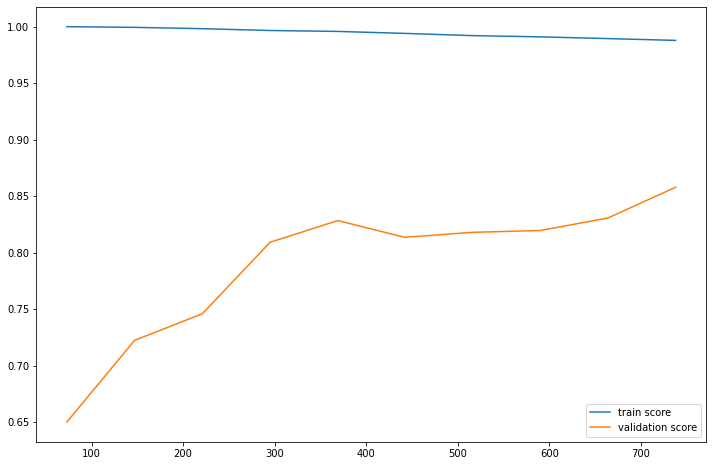

In [ ]:
courbe_apprentissage(model_gboosting)

In [ ]:
# X_train = X_train[pd.DataFrame(model_gboosting.named_steps.gradientboostingregressor.feature_importances_, index=X_train.columns) > 0.05]
pd.DataFrame(model_gboosting.named_steps.gradientboostingregressor.feature_importances_, index=X_train.columns)[model_gboosting.named_steps.gradientboostingregressor.feature_importances_ > 0.001]

,0
GrLivArea,0.261820
GarageCars,0.095552
OverallQual-s2,0.199710
OverallQual-s3,0.179969
OverallQual-Sq,0.262949


In [ ]:
X_train = X_train[['GrLivArea','GarageCars','OverallQual-s2','OverallQual-s3','OverallQual-Sq']]
X_test = X_test[['GrLivArea','GarageCars','OverallQual-s2','OverallQual-s3','OverallQual-Sq']]
X_train.shape

(984, 5)

In [ ]:
for model in [model_lr, model_ridge,model_dtree,model_rforest,model_ada,model_gboosting,model_bagging,model_knn]:
  print(model)
  model.fit(X_train, y_train)
  MAE = round(100*((abs(cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error').mean()))/(y_train.mean())),3)
  print(f'MAE cross-validation : {MAE} %\n')

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


ValueError: ignored

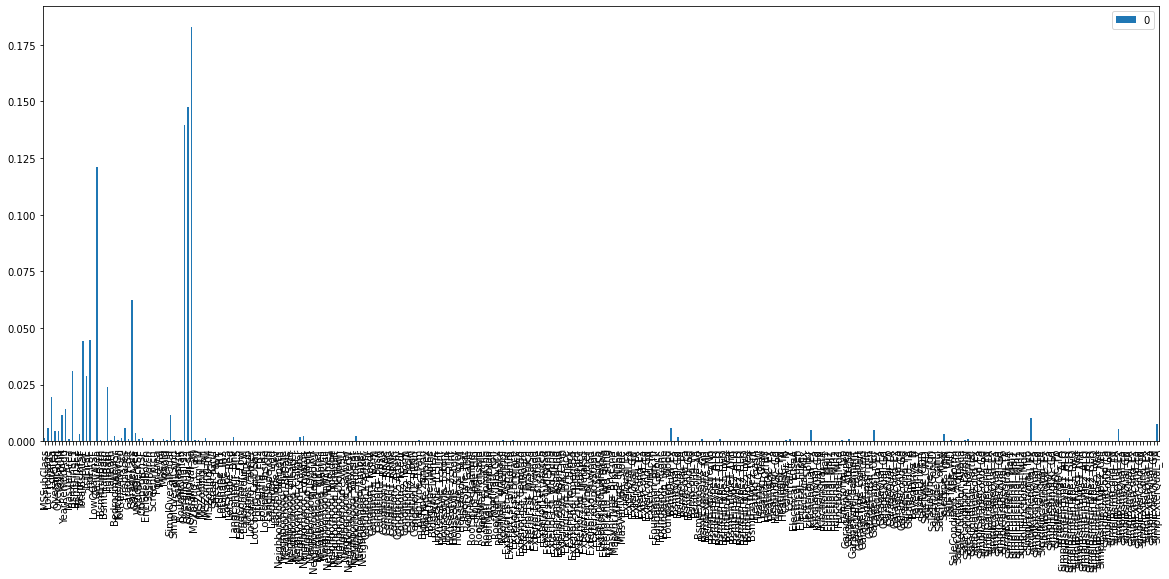

In [ ]:
pd.DataFrame(model_gboosting.named_steps.gradientboostingregressor.feature_importances_, index=X_train.columns).plot.bar(figsize=(20,8))

In [ ]:
for model in [model_lr, model_ridge,model_dtree,model_rforest,model_ada,model_gboosting,model_bagging,model_knn]:
  print(model)
  model.fit(X_train, y_train)
  print(f'Score : {model.score(X_test, y_test)}')
  MAE = round(100*((abs(cross_val_score(model_gboosting, X_train, y_train, cv=5, scoring='neg_mean_absolute_error').mean()))/(y_train.mean())),3)
  print(f'MAE : {MAE}')
  print(f'Précision en moyenne absolue des prédictions : {round((abs(model.predict(X_test)-y_test)).mean(),2)}')
  print(f'Précision en % de l\'erreur absolue des prédictions : {round(100*((abs(model.predict(X_test)-y_test)).mean())/(y_test.mean()),3)}%\n')

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model_gboosting

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                           criterion='friedman_mse', init=None,
                                           learning_rate=0.1, loss='ls',
                                           max_depth=3, max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=100,
                                           n_iter_no_change=N

In [ ]:
hyper_params = {'gradientboostingregressor__alpha':np.linspace(0.1,1,10)}

grid = GridSearchCV(model_gboosting, hyper_params, cv=4)
grid.fit(X_train,y_train)
print(grid.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: alpha must be in (0.0, 1.0) but was 1.0

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: alpha must be in (0.0, 1.0) but was 1.0

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: alpha must be in (0.0, 1.0) but was 1.0

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this t

{'gradientboostingregressor__alpha': 0.1}


In [ ]:
print(grid.scorer_)

<function _passthrough_scorer at 0x7f7e19dddbf8>


In [ ]:
model_gboosting = make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=0, alpha=0.1))
model.fit(X_train, y_train)
print(f'Score : {model.score(X_test, y_test)}')
print(f'Précision en moyenne absolue des prédictions : {round((abs(model.predict(X_test)-y_test)).mean(),2)}')
print(f'Précision en % de l\'erreur absolue des prédictions : {round(100*((abs(model.predict(X_test)-y_test)).mean())/(y_test.mean()),3)}%\n')

Score : 0.6704664035855139
Précision en moyenne absolue des prédictions : 27251.29
Précision en % de l'erreur absolue des prédictions : 14.251%



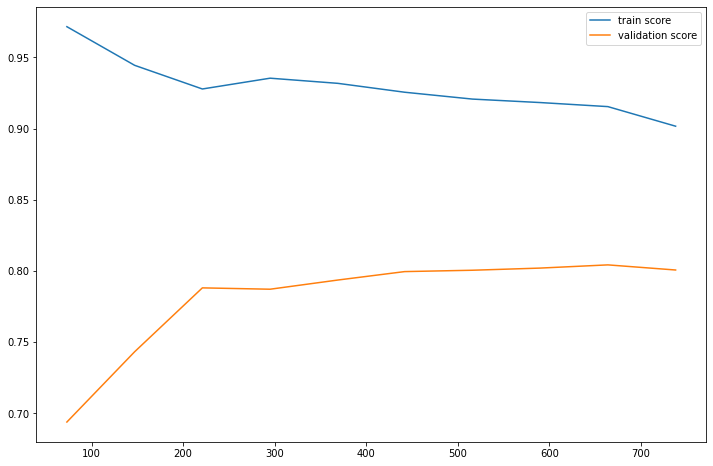

In [ ]:
courbe_apprentissage(model)

In [ ]:
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train = StandardScaler().fit_transform(X_train)
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315
0,-0.140040,-0.434659,0.093712,-0.896306,-0.544065,-0.994690,-1.236573,-0.575642,-0.081647,2.313153,-1.000467,-0.264883,-0.473664,0.591123,-0.112843,0.133439,-0.830645,-0.236379,0.773006,-0.792302,0.175594,-0.16838,-0.358538,-0.963642,-0.054160,0.190961,0.840392,-0.756926,0.322205,-0.367118,-0.116287,-0.288396,-0.071095,-0.141177,0.261926,0.896180,-0.792810,-0.429595,-0.832846,-0.345621,...,6.463947,-0.090536,-3.856289,-0.297482,-0.144038,-0.839865,1.030967,0.927423,-0.161458,-0.437359,-0.031895,-0.616510,-0.419079,-0.334461,-0.638534,4.322037,-0.330692,-0.671809,-0.115708,6.463947,-0.106326,-0.177332,-0.192044,-2.790289,-0.18628,-0.216353,-0.031895,0.293416,-0.332580,-0.18334,-0.861158,1.123418,-0.045129,-0.120137,-0.323074,0.352947,-0.211154,-0.071465,-0.741354,0.820652
1,0.097136,0.256301,-0.027454,1.290385,-0.544065,1.084679,1.015673,1.191549,1.494489,-0.285007,-0.641283,0.893988,0.769245,2.283237,-0.112843,2.443039,1.120082,-0.236379,2.588371,-0.792302,1.484568,-0.16838,2.769137,0.606265,1.064968,1.718648,2.914477,0.254776,1.495432,-0.367118,-0.116287,-0.288396,-0.071095,-0.141177,-0.863555,-0.608668,1.172241,-0.429595,1.200703,2.893342,...,-0.154704,-0.090536,0.259317,-0.297482,-0.144038,1.190668,-0.969963,0.927423,-0.161458,-0.437359,-0.031895,-0.616510,-0.419079,-0.334461,1.566088,-0.231372,-0.330692,-0.671809,-0.115708,-0.154704,-0.106326,-0.177332,-0.192044,0.358386,-0.18628,-0.216353,-0.031895,0.293416,3.006795,-0.18334,-0.861158,-0.890140,-0.045129,-0.120137,-0.323074,0.352947,-0.211154,-0.071465,1.348883,-1.218544
2,-0.851571,1.394352,0.123153,-0.167409,-0.544065,0.732786,0.440631,-0.575642,-0.238835,3.080228,-0.627813,0.254445,0.083324,-0.822772,-0.112843,-0.628880,1.120082,-0.236379,0.773006,-0.792302,0.175594,-0.16838,-0.358538,-0.963642,0.640471,0.190961,0.104939,-0.756926,-0.326158,-0.367118,-0.116287,-0.288396,-0.071095,-0.141177,0.637086,-0.608668,-0.792810,-0.429595,-0.832846,-0.345621,...,-0.154704,-0.090536,0.259317,-0.297482,-0.144038,1.190668,-0.969963,0.927423,-0.161458,-0.437359,-0.031895,-0.616510,2.386185,-0.334461,-0.638534,-0.231372,-0.330692,-0.671809,-0.115708,6.463947,-0.106326,-0.177332,-0.192044,-2.790289,-0.18628,4.622081,-0.031895,-3.408135,-0.332580,-0.18334,1.161227,-0.890140,-0.045129,-0.120137,3.095262,-2.833288,-0.211154,-0.071465,1.348883,-1.218544
3,0.097136,-0.231435,0.613094,-0.167409,-0.544065,0.796766,0.536471,-0.575642,0.795636,-0.285007,-1.110467,-0.399524,-0.618069,1.083706,-0.112843,0.435347,1.120082,-0.236379,0.773006,1.191477,0.175594,-0.16838,0.266997,-0.963642,0.717653,0.190961,-0.164904,1.476912,0.800758,-0.367118,-0.116287,-0.288396,-0.071095,-0.141177,0.637086,0.896180,-0.792810,-0.429595,-0.832846,-0.345621,...,-0.154704,-0.090536,0.259317,-0.297482,-0.144038,1.190668,-0.969963,0.927423,-0.161458,-0.437359,-0.031895,-0.616510,-0.419079,-0.334461,1.566088,-0.231372,-0.330692,-0.671809,-0.115708,-0.154704,-0.106326,-0.177332,-0.192044,0.358386,-0.18628,-0.216353,-0.031895,0.293416,-0.332580,-0.18334,1.161227,-0.890140,-0.045129,-0.120137,-0.323074,0.352947,-0.211154,-0.071465,-0.741354,0.820652
4,0.097136,0.012433,-0.368665,-0.167409,-0.544065,-0.290904,-1.092812,1.581371,-0.098640,-0.285007,-0.497609,-0.755360,-0.476243,1.031255,-0.112843,0.495729,1.120082,-0.236379,-1.042359,1.191477,1.484568,-0.16838,0.892532,0.606265,-0.594429,0.190961,-0.096120,-0.756926,0.044335,-0.367118,-0.116287,-0.288396,-0.071095,-0.141177,1.387407,0.143756,-0.792810,-0.429595,1.200703,-0.345621,...,-0.154704,-0.090536,0.259317,-0.297482,-0.144038,-0.839865,1.030967,-1.078257,-0.161458,-0.437359,-0.031895,1.622035,-0.419079,2.989882,-0.638534,-0.231372,-0.330692,-0.671809,-0.115708,-0.154704,-0.106326,-0.177332,-0.192044,

In [ ]:
model = keras.Sequential([
                          keras.layers.Dense(100, activation='relu', input_shape=X_train.shape[1:]),
                          keras.layers.Dense(100, activation='relu'),
                          keras.layers.Dense(1)
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                               patience=4, 
                                               restore_best_weights=True)

history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    validation_split = 0.2,
                    callbacks=[early_stopping])

Epoch 1/100


InvalidArgumentError: ignored